## Analyzing and predicting `Apple`  Stock Prices using Machine Learning (python, pandas, numpy and Scikit-Learn)

### 1. Problem Definition 

For this dataset, the questions that we are trying to answer is: 
> Which stocks do we choose? What are the returns and risks of this stock compared to it's competitors

### 2. Data
We use the `Apple` stock prices from Yahoo Finanace from year 2010 to year 2017. Link: https://finance.yahoo.com/quote/AAPL/history?p=AAPL

In [42]:
# import necessary extensions 
import pandas as pd 
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import pandas_datareader.data as web 
from pandas import Series, DataFrame

In [165]:
# Loading and viewing YahooFinance Apple Dataset 
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2020,1,11)
df = web.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,26.061205
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.466835
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.512596
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.090879
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.042646


In [166]:
# Rolling mean analysis 
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg.tail(10)

Date
2019-12-27    237.841293
2019-12-30    238.774814
2019-12-31    239.686144
2020-01-02    240.680702
2020-01-03    241.651266
2020-01-06    242.561192
2020-01-07    243.518790
2020-01-08    244.534164
2020-01-09    245.566394
2020-01-10    246.567398
Name: Adj Close, dtype: float64

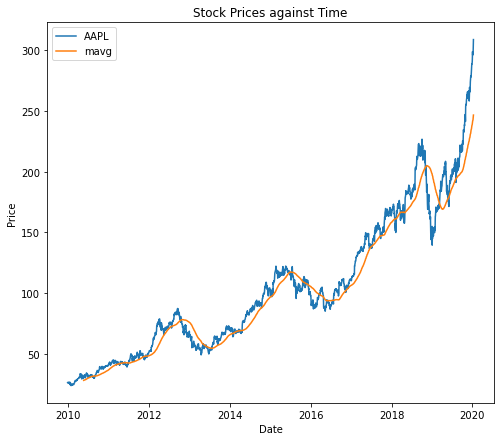

In [173]:
# Overlaying and plotting moving average against stock price chart 
%matplotlib inline 

# Plotting the graphs
fig, ax = plt.subplots(figsize=(8,7))
ax.plot(close_px, label='AAPL')
ax.plot(mavg, label='mavg')
plt.legend()

# Setting axis labels
plt.title('Stock Prices against Time')
plt.xlabel('Date')
plt.ylabel('Price');

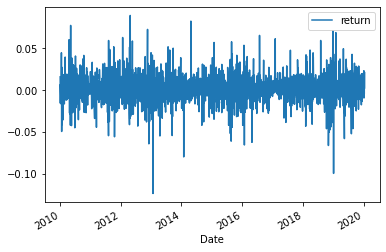

In [174]:
# Plotting rate of returns 
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')
plt.legend();

The graph indicates that the stock is relatively volatile in price, risk-adverse investors may not consider investing in Apple stocks

Next, we are going to analyse our competitor's stocks to see if there is any possible correlation between their stock prices and ours 

In [175]:
# Import and view competitors' stock prices 
dfcomp = web.DataReader(['AAPL','GE','GOOG','IBM', 'MSFT'],'yahoo', start = start, end=end)['Adj Close']
dfcomp.head()

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2009-12-31,26.061205,10.633293,308.832428,93.616028,23.858992
2010-01-04,26.466835,10.858186,312.204773,94.724556,24.226894
2010-01-05,26.512596,10.914412,310.829926,93.580284,24.234720
2010-01-06,26.090879,10.858186,302.994293,92.972382,24.085989
2010-01-07,26.042646,11.420421,295.940735,92.650536,23.835503


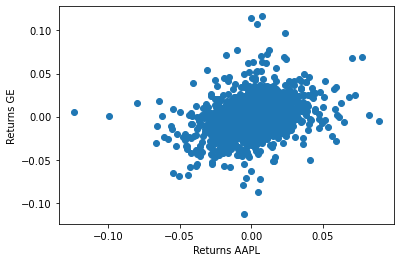

In [176]:
# Finding out if there is a correlation between prices of different stocks 
retscomp = dfcomp.pct_change()
corr = retscomp.corr()

# Plotting Apple vs GE graph 
plt.scatter(retscomp.AAPL, retscomp.GE)
plt.xlabel('Returns AAPL')
plt.ylabel('Returns GE');

In [177]:
# Run kernel density estimation 
from pandas.plotting import scatter_matrix

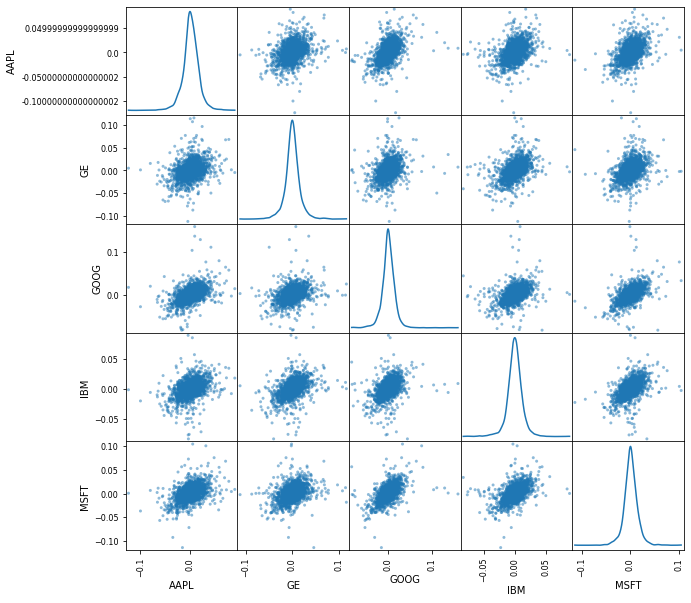

In [178]:
pd.plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(10,10));

From the above graph, we can see that most of the distributions among stocks have approximately positive correlations

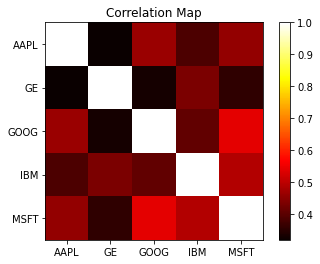

In [179]:
# Graphing the correlations 
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)
plt.title('Correlation Map');

Lighter colour means higher correlation value. However, it is important to note that this is not conclusive proof ofcausality; it could just show the trend in the technological industry rather than showing how competing stocks affect rach other

Apart from correlation, we can also analyse each stock's risk and returns. In this case, we are extracting the average of returns (Return Rate) and the standard deviation of returns (Risk)

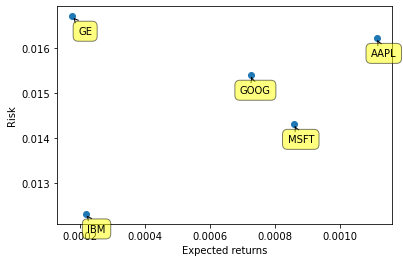

In [180]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [181]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfreg

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2009-12-31,26.061205,88102700.0,1.323968,-1.126074
2010-01-04,26.466835,123432400.0,0.990606,0.271752
2010-01-05,26.512596,150476200.0,1.091520,-0.102519
2010-01-06,26.090879,138040000.0,2.123523,-1.590633
2010-01-07,26.042646,119282800.0,1.400893,-0.552538
...,...,...,...,...
2020-01-06,298.282715,29596800.0,2.404934,2.045672
2020-01-07,296.879883,27218000.0,1.146145,-0.483585
2020-01-08,301.655548,33019800.0,2.401134,2.029209


Here we preprocess the missing data in order to: 
1. Drop missing value 
2. Separating the label (AdjClose) 
3. Scale the X so that everyone can have the same distribution for linear regression 
4. Find Data Series of late X and early X (train) for model generation and evaluation 
5. Separate label and identify it as y 
6. Separating train and test data by using cross validation train test split

In [182]:
import math 
from sklearn import preprocessing
# Drop missing value 
dfreg.fillna(value=-99999, inplace=True)

forecast_out = int(math.ceil(0.01 * len(dfreg)))

# Separate the label (AdjClose)
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)

X = np.array(dfreg.drop(['label'],axis=1))

# Scale the X so that everyone can have the same distribution for linear regression 
X = preprocessing.scale(X)

# We want to find Data Series for model generation and evaluation 
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

# Separate label and identify it as y 
y = np.array(dfreg['label'])
y = y[:-forecast_out]

In [183]:
# Making training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)
X_train.shape, X_test.shape

((1998, 4), (500, 4))

## Model Generation 

In [184]:
from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import make_pipeline

In [185]:
# Make a dictionary of models 
models = {'Linear Regression': LinearRegression(n_jobs=-1),
          'Quadratic Regression 2': make_pipeline(PolynomialFeatures(2),Ridge()),
          'Quadratic Regression 3': make_pipeline(PolynomialFeatures(3), Ridge()),
          'K Nearest Neighbors': KNeighborsRegressor(n_neighbors=2)}

# Make a fit and score function 
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models. 
    models : a dictionary of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : training data (no labels)
    y_train : training labels 
    y_test : testing labels
    """
    
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models 
    for name, model in models.items():
        # Fit the model to the data 
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores 
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [186]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

{'Linear Regression': 0.973061781041708,
 'Quadratic Regression 2': 0.9726856503623914,
 'Quadratic Regression 3': 0.9724688569659145,
 'K Nearest Neighbors': 0.956025463379652}

## Model Comparison

In [208]:
# Install Seaborn package in current environment 
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: done

## Package Plan ##

  environment location: /Users/saisheinhtet/Desktop/predict_stock_prices/env

  added / updated specs:
    - seaborn


The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/noarch::seaborn-0.10.1-py_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done


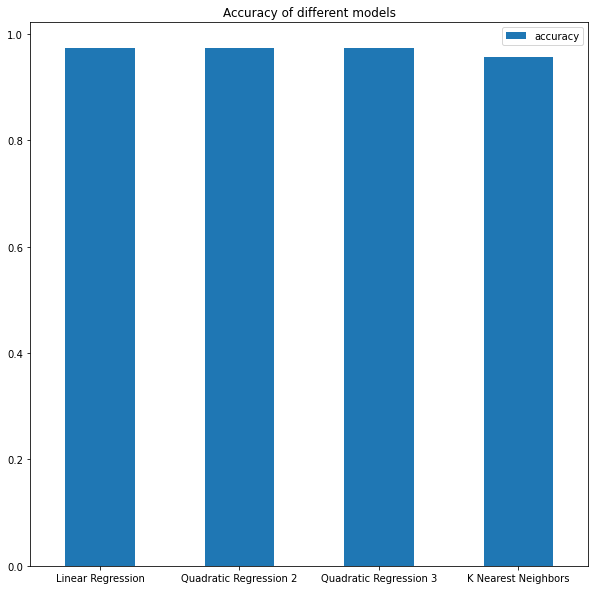

In [210]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar(figsize=(10,10));
plt.xticks(rotation=0);
plt.title('Accuracy of different models');

Quadratic Regression 3 gives the best results

## Hyperparameter Tuning (By hand)

Next, we're going to tune the K nearest Neighbor model by hand

In [188]:
# Tuning KNN by hand 

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors parameter 
neighbors = range(1,25)

# Create an instance of KNN 
knn = KNeighborsRegressor()

# Loop through the different n_neighbors parameter 
for i in neighbors: 
    knn.set_params(n_neighbors=i)
    
    # Fit the model with selected parameter 
    knn.fit(X_train, y_train)
    
    # Update the training scores list: 
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list 
    test_scores.append(knn.score(X_test, y_test))

In [189]:
train_scores

[1.0,
 0.9825441988741381,
 0.9758382591331612,
 0.973441238980043,
 0.9705022328960347,
 0.9685663123042765,
 0.9677802515479809,
 0.9670435368411384,
 0.966231016316303,
 0.965922913180683,
 0.9652964600639469,
 0.96410603876717,
 0.9635477427179409,
 0.9628481569640535,
 0.9620870361510496,
 0.9612271105944964,
 0.9605040145697353,
 0.9595948310091937,
 0.9588825550701402,
 0.958264131127501,
 0.9578025954254562,
 0.9571215736219905,
 0.9568234793683149,
 0.9561197231565899]

In [190]:
test_scores

[0.9451289803507351,
 0.956025463379652,
 0.9593516662377477,
 0.961973012900965,
 0.9638115171225281,
 0.9634656230281458,
 0.9641665365996205,
 0.9652096702726047,
 0.9647939838805373,
 0.965444889289437,
 0.9657569864742526,
 0.9655323410341722,
 0.9658251819684486,
 0.9652715661461869,
 0.9649721874455608,
 0.9646307276771,
 0.9647379933671324,
 0.9647216042389511,
 0.964569625789224,
 0.963732201838914,
 0.9635156095432831,
 0.9629367107951551,
 0.9626033219775434,
 0.9621585238146103]

Presenting the effects of changed parameters in a more visual format

Maximum KNN score on the test data: 96.58%


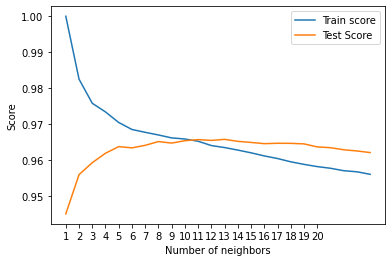

In [191]:
plt.plot(neighbors, train_scores, label='Train score')
plt.plot(neighbors, test_scores, label='Test Score')
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number of neighbors')
plt.ylabel('Score')
plt.legend()
print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

Since maximum score on KNN model after we tuned is still less than the untuned Quadratic Regressions model, we shall continue to tune them using RandomizedSearchCV functionality.

## Hyperparameter tuning using RandomizedSearchCV

In [192]:
from sklearn.model_selection import RandomizedSearchCV

In [193]:
# Create a hyperparameter grid for Quadratic Regression
quad_reg_2_grid = {'polynomialfeatures__degree': np.arange(21)}

quad_reg_3_grid = {'polynomialfeatures__degree': np.arange(21)}

In [194]:
# Tune Quadratic regression 2
np.random.seed(42)

# Setup random hyperparameter search for Quadratic Regression 2
quad_reg_2 = RandomizedSearchCV(make_pipeline(PolynomialFeatures(2),Ridge()),
                                param_distributions=quad_reg_2_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for Quadratic Regression 2
quad_reg_2.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/saisheinhtet/Desktop/predict_stock_prices/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/saisheinhtet/Desktop/predict_stock_prices/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/saisheinhtet/Desktop/predict_stock_prices/env/lib/python3.8/site-packages/sklearn/pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/saisheinhtet/Desktop/predict_stock_prices/env/lib/python3.8/site-packages/sklearn/pipeline.py", line 292, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/saisheinhtet/Desktop/predict_stock_prices/env/lib/

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures()),
                                             ('ridge', Ridge())]),
                   n_iter=20,
                   param_distributions={'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])},
                   verbose=True)

In [195]:
quad_reg_2.best_params_

{'polynomialfeatures__degree': 1}

In [196]:
quad_reg_2.score(X_test, y_test)

0.9730688851641738

In [197]:
# Tune Quadratic regression 3
np.random.seed(42)

# Setup random hyperparameter search for Quadratic Regression 3
quad_reg_3 = RandomizedSearchCV(make_pipeline(PolynomialFeatures(3),Ridge()),
                                param_distributions=quad_reg_3_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for Quadratic Regression 3
quad_reg_3.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/saisheinhtet/Desktop/predict_stock_prices/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/saisheinhtet/Desktop/predict_stock_prices/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/saisheinhtet/Desktop/predict_stock_prices/env/lib/python3.8/site-packages/sklearn/pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/saisheinhtet/Desktop/predict_stock_prices/env/lib/python3.8/site-packages/sklearn/pipeline.py", line 292, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/saisheinhtet/Desktop/predict_stock_prices/env/lib/

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/saisheinhtet/Desktop/predict_stock_prices/env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/saisheinhtet/Desktop/predict_stock_prices/env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/saisheinhtet/Desktop/predict_stock_prices/env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/saisheinhtet/Desktop/predict_stock_prices/env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Usin

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures(degree=3)),
                                             ('ridge', Ridge())]),
                   n_iter=20,
                   param_distributions={'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])},
                   verbose=True)

In [198]:
quad_reg_3.score(X_test, y_test)

0.9730688851641738

Both scores are lesser than original, so we will just take Quadratic Regression 3 as the best model. From here on out, when We refer to 'model', it is Quadratic Regression 3. We have a model that predicts the Apple stock prices

## Saving trained machine learning model using `joblib`

In [211]:
from joblib import dump, load
# Save model to file 
dump(quad_reg_3, filename='quad_reg_3_model.joblib')

['quad_reg_3_model.joblib']

In [212]:
# Import a saved joblib model 
loaded_joblib_model = load(filename='quad_reg_3_model.joblib')

In [213]:
loaded_joblib_model.score(X_test, y_test)

0.9730688851641738